In [3]:
import numpy as np

import pandas as pd
import seaborn as sns_raw
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [4]:
# Reading the dataset
df_raw = pd.read_excel("Company_x.xlsx", sheet_name="Debtbook")
df_raw.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,53.0,0,0,1,NaN,NaN,NaN,NaN
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,...,NaN,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,Y,...,NaN,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,...,Cheque,1.0,46.0,2,0,1,NaN,NaN,NaN,NaN


In [5]:
df_raw.descibe()

AttributeError: 'DataFrame' object has no attribute 'descibe'

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

In [4]:
df_raw.dtypes

EntityID                        int64
OriginalCreditor[Redacted]     object
AccountID                       int64
CurrentBalance                float64
DebtLoadPrincipal             float64
BalanceAtDebtLoad             float64
PurchasePrice                 float64
ProductOrDebtType              object
CollectionStatus               object
IsStatBarred                   object
ClosureReason                  object
InBankruptcy                   object
AccountInsolvencyType          object
CustomerInsolvencyType         object
IsLegal                        object
LastPaymentAmount             float64
LastPaymentMethod              object
NumLiableParties              float64
CustomerAge                   float64
NumPhones                       int64
NumEmails                       int64
NumAddresses                    int64
Unnamed: 22                   float64
Unnamed: 23                   float64
Unnamed: 24                   float64
Unnamed: 25                   float64
dtype: objec

In [5]:
# If target variable is evenly distributed between 0 and 1, then it is a balanced dataset.
df_raw['IsStatBarred'].value_counts()

Y    284548
N    121875
Name: IsStatBarred, dtype: int64

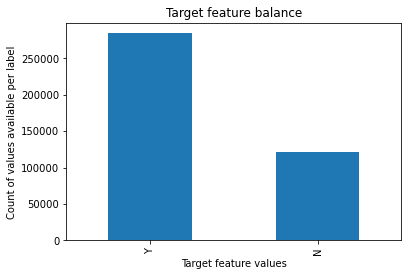

In [6]:
#Analyzing the is target variable balance or not?
df_raw['IsStatBarred'].value_counts().plot(kind='bar')

plt.title('Target feature balance')

plt.xlabel('Target feature values')
plt.ylabel('Count of values available per label')

plt.show()

In [7]:
# Check null Values
df_raw.isnull().sum()

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
BalanceAtDebtLoad                  0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
IsStatBarred                       0
ClosureReason                 397393
InBankruptcy                       0
AccountInsolvencyType         406138
CustomerInsolvencyType        397892
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
Unnamed: 22                   406423
Unnamed: 23                   406423
Unnamed: 24                   406423
Unnamed: 25                   406422
dtype: int64

In [8]:
# Data Preprocessing

# Preprocessing step: Dropping 'AccountInsolvencyType' column since 99% of values present are null.
df_raw = df_raw.drop(['AccountInsolvencyType'], axis = 1)

# Preprocessing step: Dropping 'CustomerInsolvencyType' column since 99% of values present are null.
df_raw = df_raw.drop(['CustomerInsolvencyType'], axis = 1)

# Preprocessing step: Dropping 'ClosureReason' column since 99% of values present are null.
df_raw = df_raw.drop(['ClosureReason'], axis = 1)

# Preprocessing step: Dropping 'LastPaymentAmount' column since 99% of values present are null.
df_raw = df_raw.drop(['LastPaymentAmount'], axis = 1)

# Preprocessing step: Dropping 'LastPaymentAmount' column since 99% of values present are null.
df_raw = df_raw.drop(['LastPaymentMethod'], axis = 1)

# Preprocessing step: Dropping 'Unnamed: 22' column since all values present are null.
df_raw = df_raw.drop(['Unnamed: 22'], axis = 1)

# Preprocessing step: Dropping 'Unnamed: 23' column since all values present are null.
df_raw = df_raw.drop(['Unnamed: 23'], axis = 1)

# Preprocessing step: Dropping 'Unnamed: 24' column since all values present are null.
df_raw = df_raw.drop(['Unnamed: 24'], axis = 1)

# Preprocessing step: Dropping 'Unnamed: 25' column since all values present are null.
df_raw = df_raw.drop(['Unnamed: 25'], axis = 1)








In [9]:
# Check null Values
df_raw.isnull().sum()

EntityID                          0
OriginalCreditor[Redacted]        0
AccountID                         0
CurrentBalance                    0
DebtLoadPrincipal                 0
BalanceAtDebtLoad                 0
PurchasePrice                  2692
ProductOrDebtType                 0
CollectionStatus                  0
IsStatBarred                      0
InBankruptcy                      0
IsLegal                           0
NumLiableParties                122
CustomerAge                   29482
NumPhones                         0
NumEmails                         0
NumAddresses                      0
dtype: int64

<AxesSubplot:xlabel='CustomerAge'>

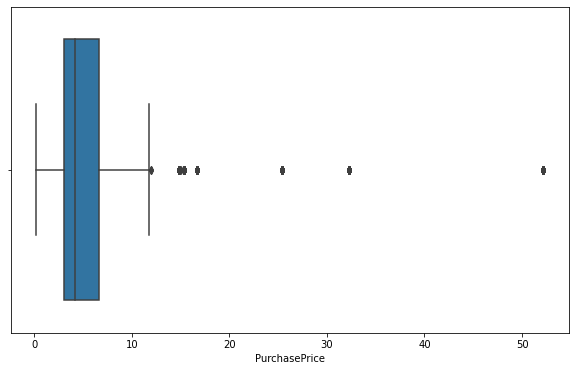

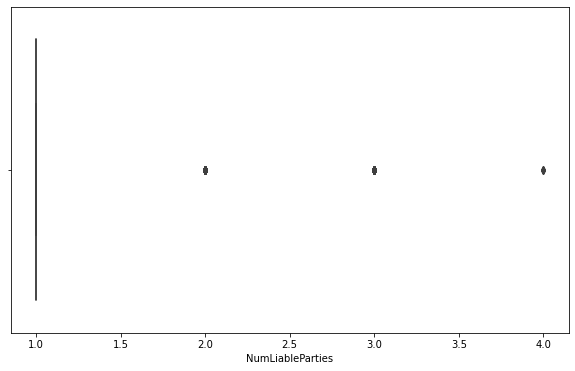

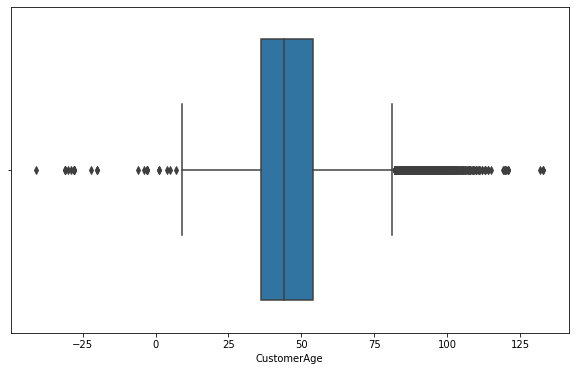

In [10]:
## Checking Outliers and Skewness

import seaborn as sns
# Imputation of null values
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(df_raw.PurchasePrice)

fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(df_raw.NumLiableParties)

fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(df_raw.CustomerAge)

<AxesSubplot:xlabel='CustomerAge', ylabel='Density'>

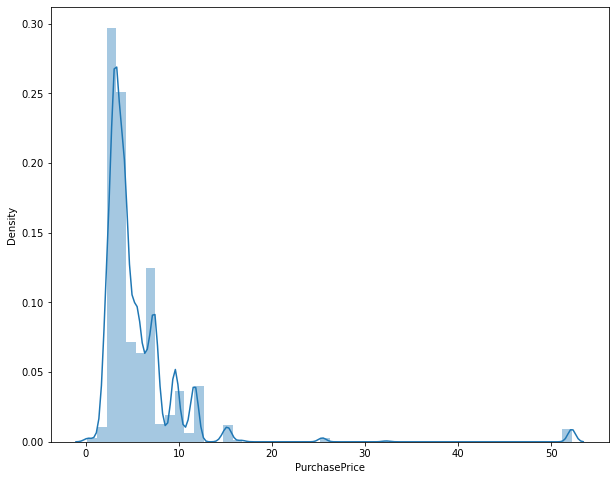

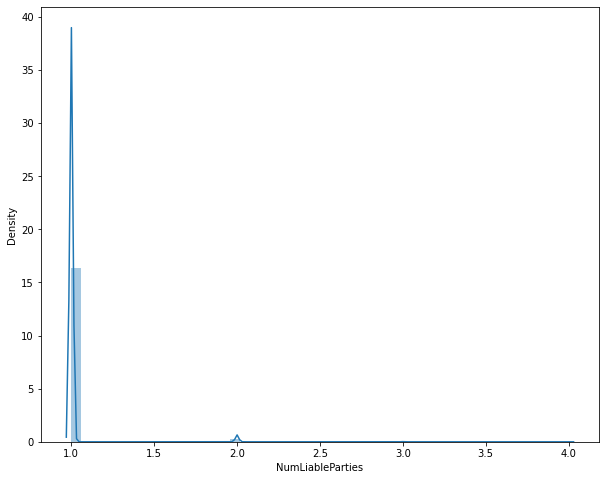

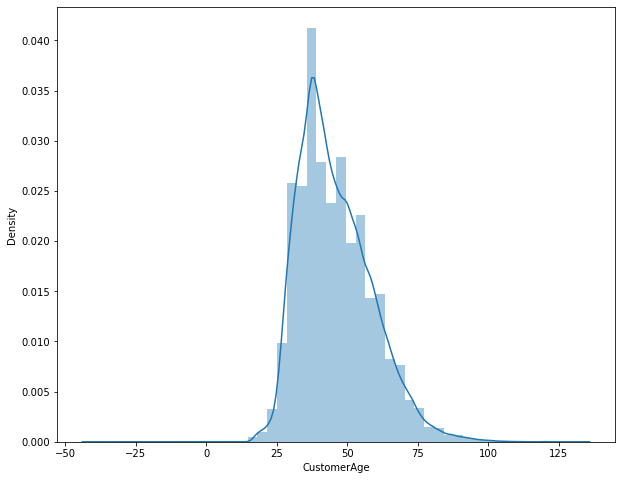

In [11]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df_raw.PurchasePrice)

fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df_raw.NumLiableParties)

fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df_raw.CustomerAge)

In [12]:
# Impute null values with mode

df_raw['PurchasePrice'] = df_raw['PurchasePrice'].fillna(df_raw['PurchasePrice'].mode()[0])

df_raw['NumLiableParties'] = df_raw['NumLiableParties'].fillna(df_raw['NumLiableParties'].mode()[0])

df_raw['CustomerAge'] = df_raw['CustomerAge'].fillna(df_raw['CustomerAge'].mode()[0])

In [13]:
# Check null Values
df_raw.isnull().sum()

EntityID                      0
OriginalCreditor[Redacted]    0
AccountID                     0
CurrentBalance                0
DebtLoadPrincipal             0
BalanceAtDebtLoad             0
PurchasePrice                 0
ProductOrDebtType             0
CollectionStatus              0
IsStatBarred                  0
InBankruptcy                  0
IsLegal                       0
NumLiableParties              0
CustomerAge                   0
NumPhones                     0
NumEmails                     0
NumAddresses                  0
dtype: int64

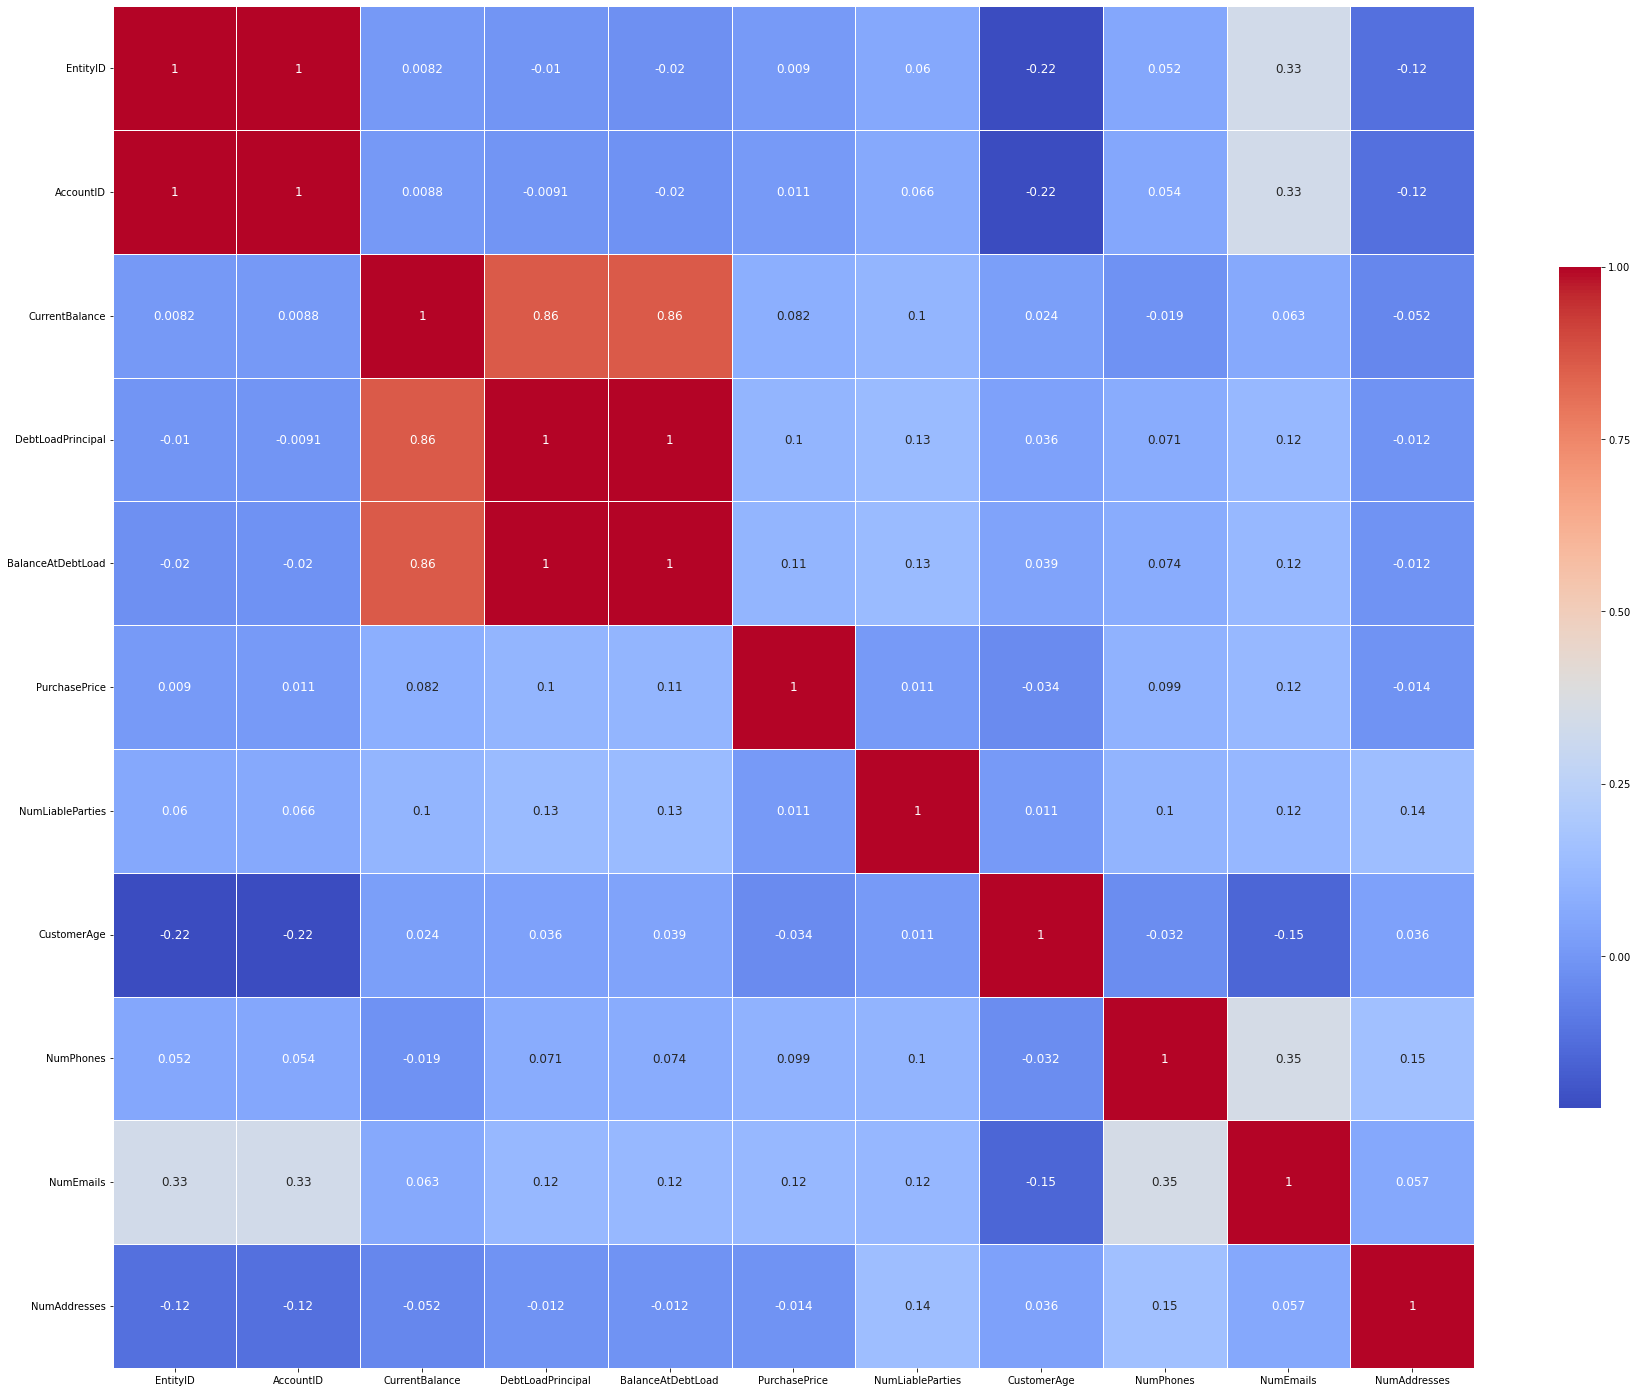

In [14]:
#Checking features correlation

# Checking the correlation between features.
mask_raw = np.zeros_like(df_raw.corr(), dtype=np.bool)

fig, axis = plt.subplots(figsize=(25,20))

heatmap_raw = sns_raw.heatmap(df_raw.corr(), 
                      mask = mask_raw,
                      cmap = 'coolwarm',
                      square = True,
                      linewidths = .6,
                      cbar_kws = {'shrink': .6, 
                                'ticks' : [-1, -.75,-.5,-.25, 0, .25, 0.5, 0.75, 1]},
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

axis.set_xticklabels(df_raw.corr().columns)
axis.set_yticklabels(df_raw.corr().columns, rotation = 0)


sns_raw.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.tight_layout()

In [15]:
###Convert Catagorical column to Numerical
df_raw.rename(columns={'OriginalCreditor[Redacted]':'Creditor'},inplace=True)
df_raw['Creditor']=df_raw['Creditor'].str.replace('Creditor',"",regex=True)
df_raw['Creditor']=pd.to_numeric(df_raw['Creditor'])



In [16]:
## Apply Label Encoding to Convert Catagorical column to Numerical
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'ProductOrDebtType'. 
df_raw['ProductOrDebtType']= label_encoder.fit_transform(df_raw['ProductOrDebtType']) 
  
df_raw['ProductOrDebtType'].unique() 

array([5, 6, 9, 2, 4, 1, 8, 0, 3, 7])

In [17]:
# Encode labels in column 'ProductOrDebtType'. 
df_raw['CollectionStatus']= label_encoder.fit_transform(df_raw['CollectionStatus']) 
  
df_raw['CollectionStatus'].unique() 

array([ 7,  1,  8,  2,  0, 10, 11,  4,  5,  6,  3,  9])

In [18]:
## Replace String Values to Numerical
df_raw['InBankruptcy'].replace("N", 0, inplace = True)
df_raw['InBankruptcy'].replace("Y", 1, inplace = True)

In [19]:
df_raw['IsLegal'].replace("N", 0, inplace = True)
df_raw['IsLegal'].replace("Y", 1, inplace = True)

In [20]:
df_raw['IsStatBarred'].replace("N", 0, inplace = True)
df_raw['IsStatBarred'].replace("Y", 1, inplace = True)

In [21]:
df_final = df_raw

In [22]:
df_final.head()

,EntityID,Creditor,AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,932,1,3677,0.0,1160.20,1160.20,4.22,5,7,0,0,1,1.0,53.0,0,0,1
1,160,2,4276,182.9,182.90,182.90,4.22,5,1,1,0,0,1.0,38.0,0,0,1
2,932,1,8525,0.0,538.57,538.57,4.22,5,7,0,0,0,1.0,38.0,1,0,1
3,160,2,9859,8279.5,8279.50,8279.50,4.22,5,8,1,0,0,1.0,38.0,1,0,1
4,932,1,12807,0.0,523.00,523.00,4.22,5,7,1,0,1,1.0,46.0,2,0,1


In [23]:
##Feature extration for machine learning classification.
# Splitting features and target variables from dataframe.
y = df_final['IsStatBarred']
X = df_final.drop(['IsStatBarred'], axis = 1)

In [24]:
y.value_counts()

1    284548
0    121875
Name: IsStatBarred, dtype: int64

In [25]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
# Applying scaling on feature variables
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Random Forest Baseline Model
#Random Forest Classifier model with Train and Test split 
clf_base = RandomForestClassifier()

#Training the model
clf_base.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred = clf_base.predict(X_test)

In [29]:
# Random Forest baseline model accuracy
print("RF Base line model accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

RF Base line model accuracy: 97.52844928338563


In [30]:
# Random Forest baseline classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     24309
           1       0.98      0.99      0.98     56976

    accuracy                           0.98     81285
   macro avg       0.97      0.97      0.97     81285
weighted avg       0.98      0.98      0.98     81285



In [31]:
## SVM Classifier SVM base model
# train the model on train set
model_base_SVM = SVC()
model_base_SVM.fit(X_train, y_train)
 
# print prediction results
y_pred_base = model_base_SVM.predict(X_test)
print(classification_report(y_test, y_pred_base))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     24309
           1       0.96      0.97      0.96     56976

    accuracy                           0.95     81285
   macro avg       0.94      0.94      0.94     81285
weighted avg       0.95      0.95      0.95     81285



In [32]:
test_accuracy_svm_base = accuracy_score(y_test,y_pred_base)*100

print("SVM accuracy for testing dataset without hyper parameter tuning is : {:.2f}%".format(test_accuracy_svm_base) )

SVM accuracy for testing dataset without hyper parameter tuning is : 95.03%


In [33]:
##Logistic Regression Classifier
#LR base model
lr_base_clf = LogisticRegression()

lr_base_clf.fit(X_train, y_train)

LogisticRegression()

In [34]:
# make predictions for test data
y_pred_lr_base = lr_base_clf.predict(X_test)

# LR base model accuracy
print("LR base model accuracy:", metrics.accuracy_score(y_test, y_pred_lr_base)*100)

LR base model accuracy: 82.03112505382298


In [35]:
# Logistic Regression base model classification report
print(classification_report(y_test, y_pred_lr_base))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66     24309
           1       0.84      0.93      0.88     56976

    accuracy                           0.82     81285
   macro avg       0.80      0.75      0.77     81285
weighted avg       0.82      0.82      0.81     81285



Result- Random Forest base line model accuracy is better than other classifiers and it is 97.52%